In [115]:
import sympy as sp
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

# from scipy import optimize


# from scipy.integrate import simps
# from scipy.optimize import curve_fit
# from scipy import linalg

from sympy.interactive import printing 
printing.init_printing(use_latex = True)

This is a quick and dirty Jupyter notebook describing the steps to follow in order to obtain all thermodynamic parameters for the new three phases. 

# Molar mass of the unknown component

Getting the molar mass of $X_2O_3$ using X-ray data (unit cell volume) and density of vicentite
$$ V_m= N_A V_{cell} / Z $$

where $V_m$ is the molar mass in $cm^3/mol$, $N_A$ is the avogadro's number, $V_{cell}$ is the cell volume and $Z$ is the number of formula units in the unit cell

### Example of corundum

This is a demostration example for corundum taking the cell parameters from internet

In [116]:
# unit convertion factors
N_A = 6.022E23
factor = 1E-24

# V0 = 2.558 molar volume J/bar/mol Uniaxial a = 4.7592, c = 12.9918, Z = 6 (trigonal) Vm = 254.84
Z = 6
a = 4.7592
c = 12.9918 

# V_cell = 254.84 A3
V_cell = a**2*c*np.sin(np.pi/3)
print(V_cell)

# Vm = 25.58 cm3/mol
Vm = N_A*(V_cell)*factor/Z
print(Vm)

254.84016042720805
25.577457434877445


In [117]:
# this factor is used is some books to transform directly V_cell/Z to V_m
N_A*factor
6.023E23*1E-24

## Solution

## From molar volume and density compute the molar mass of the new component

### Getting the molar mass of the new component X2O3

In [118]:
# Obtain random cell parameters consintent with trigonal symmetry
# V0 = 2.658 molar volume J/bar/mol Uniaxial a = 4.751, c = 12.97, Z = 6 (trigonal) Vm = 254.84
Z = 6
a = 5.758
c = sp.symbols('c')

# V_cell = 
V_cell = a**2*c*np.sin(np.pi/3)

# Vm = 25.58 cm3/mol
#Vm = N_A*(V_cell)*factor/Z
Vm = sp.symbols('V_m')
Vm = 2.658*10
myfunction = sp.Eq(Vm, N_A*(V_cell)*factor/Z)
#Vm = 2.658
myfunction_solved = sp.solve(myfunction,c)
myfunction_solved

In [119]:
# density in kg/m3
N_vic = sp.Symbol('N_vic') # 247.9985
Vm_vic = 2.6578
rho = 9330.7
density = sp.Eq(rho, N_vic/1000/(Vm_vic*10/1E6))
myfunction_solved = sp.solve(density,N_vic)
myfunction_solved # This is the molar mass of the new component

In [120]:
density

In [121]:
V_cell

## From X-ray data to molar volume

In [122]:
# vic      EoS = 2 |                                                                   
# X2O3(1)
# G0 = -1560000 S0 = 49.9 V0 = 2.658  
# c1 = 160.0 c2 = .600E-2 c3 = -2560600 c5 = -599.2  
# b1 = .429E-4 b5 = -.429E-3 b6 = 2620000. b7 = -388 b8 = 4  


#N_vic = 247.9985 # g/mol
X2O3  =   247.9985
N_vic = X2O3

Z = 6
a = 5.758
c = 9.223

# V_cell
V_cell = a**2*c*np.sin(np.pi/3)

# Vm = 26.58 cm3/mol
Vm = N_A*(V_cell)*factor/Z
print(Vm.round(4))

# density in kg/m3 = 9330.7
N_vic/1000/(Vm/1E6)

26.5788


## preparing the data

In [123]:
# getting the unit cell from the Vm*10 for cubic minerals
a = sp.Symbol('a')
V_cell = a**3
Vm = 3.978*10
Z = 8
molar_volume = sp.Eq(Vm, N_A*(V_cell)*factor/Z)
cell_parameter = sp.solve(molar_volume, a)
cell_parameter

In [124]:
# menz     EoS = 2                                                                    
# MGO(3)X2O3(1)SIO2(3)
# G0 = -5900105 S0 = 280.3 V0 = 8.318  
# c1 = 600.0 c3 = -5100000 c5 = -4000.2  
# b1 = .2500E-4 b5 = -.2500E-3 b6 = 2007000. b7 = -300.55 b8 = 4   
# end

#N_menz = 549.16 # g/mol
MGO   =   40.3040
X2O3  =   247.9985
SIO2  =   60.0840
N_menz = 3*MGO + X2O3 + 3*SIO2

# unit cell 10.338 menzelite, 8.085 romainite
a_unit_cell = 10.3384647332071
V_cell = a_unit_cell**3

# Vm = 25.58 cm3/mol
Z = 8
Vm = N_A*(V_cell)*factor/Z

# density in kg/m3 = 6602.4
N_menz/1000/(Vm/1E6)


In [125]:
# rom    EoS = 2                                                                   
# MGO(1)X2O3(1)
# G0 = -2106030 S0 = 81.5 V0 = 3.978  
# c1 = 342.7 c2 = -.5037E-2 c3 = -2205100 c5 = -1678.1  
# b1 = .431E-4 b5 = -.431E-3 b6 = 1945000. b7 = -291.75 b8 = 4   
# end

#N_rom = 549.16 # g/mol
MGO   =   40.3040
X2O3  =   247.9985
N_rom = MGO + X2O3

# unit cell 10.338 menzelite, 8.085 romainite
a_unit_cell = 8.085
V_cell = a_unit_cell**3

# Vm = 39.782 cm3/mol
Z = 8
Vm = N_A*(V_cell)*factor/Z

# density in kg/m3 = 7247.8
N_rom/1000/(Vm/1E6)

In [126]:
Vm

## Getting the formula unit for the other phases 

Here I proceed slightly differently that in the classroom by writing a system of equations. The obtain values are the corresponding number of moles of each component.

### Menzelenite

In [129]:
# menz     EoS = 2                                                                    
# MGO(3)X2O3(1)SIO2(3)
# G0 = -5900105 S0 = 280.3 V0 = 8.318  
# c1 = 600.0 c3 = -5100000 c5 = -4000.2  
# b1 = .2500E-4 b5 = -.2500E-3 b6 = 2007000. b7 = -300.55 b8 = 4   
# end

# Phase Compositions (weight percentages):
#                    wt %      vol %     mol %     mol        MGO      X2O3     SIO2 
#  menz             100.00    100.00    100.00     1.00       22.018   45.159   32.823

#N_menz = 549.16 # g/mol
n_MGO, n_X2O3, n_SIO2, rho = sp.symbols('nMgO , nX_{2}O_3, nSiO_2, d') 
N_menz = n_MGO*MGO + n_X2O3*X2O3 + n_SIO2*SIO2
Vm = 8.318*10

# from chemical formula
MGO   =   40.3040
X2O3  =   247.9985
SIO2  =   60.0840

rho = 6602.4
Eq1 = sp.Eq(rho, N_menz/1000/(Vm/1E6))
Eq2 = sp.Eq(n_MGO, n_X2O3*(22.018/MGO)/(45.159/X2O3))
Eq3 = sp.Eq(n_MGO, n_SIO2*(22.018/MGO)/(32.823/SIO2))

system = [Eq1, Eq2, Eq3]
sol = sp.solve(system, [n_MGO, n_X2O3, n_SIO2])
sol.values()

dict_values([3.00020178676459, 1.00003686608943, 3.00013075779508])

### Romainite

In [130]:
# rom    EoS = 2                                                                   
# MGO(1)X2O3(1)
# G0 = -2106030 S0 = 81.5 V0 = 3.978  
# c1 = 342.7 c2 = -.5037E-2 c3 = -2205100 c5 = -1678.1  
# b1 = .431E-4 b5 = -.431E-3 b6 = 1945000. b7 = -291.75 b8 = 4   
# end

# Phase Compositions (weight percentages):
#                    wt %      vol %     mol %     mol        X2O3     MGO  
#  rom              100.00    100.00    100.00     1.00       86.020   13.980

#N_menz = 549.16 # g/mol
n_MGO, n_X2O3, n_SIO2, rho = sp.symbols('nMgO , nX_{2}O_3, nSiO_2, d') 
N_rom = n_MGO*MGO + n_X2O3*X2O3
Vm = 3.978 *10

# from chemical formula
MGO   =   40.3040
X2O3  =   247.9985
SIO2  =   60.0840

rho = 7247.8
Eq1 = sp.Eq(rho, N_rom/1000/(Vm/1E6))
Eq2 = sp.Eq(n_MGO, n_X2O3*(13.980/MGO)/(86.020/X2O3))

system = [Eq1, Eq2]
sol = sp.solve(system, [n_MGO, n_X2O3])
sol.values()
#sp.symbols('c')

dict_values([1.00006908156014, 1.00004919278463])

# Heat capacity

In [131]:
file_name = "Calorimetric_data/Calorimetric_data_1bar.csv"
enthalpy = pd.read_csv(file_name, delimiter=',')
#list(isotherm)
enthalpy.columns = enthalpy.columns.str.replace(' ', '')
enthalpy['menz_h298'] = enthalpy['menz_h(J/mol)']-enthalpy['menz_h(J/mol)'].iloc[0]
enthalpy['vic_h298'] = enthalpy['vic_h(J/mol)']-enthalpy['vic_h(J/mol)'].iloc[0]
enthalpy['rom_h298'] = enthalpy['rom_h(J/mol)']-enthalpy['rom_h(J/mol)'].iloc[0]

# we need the derivate relative to T
enthalpy['Cp_menz'] = enthalpy['menz_h298'].diff()/enthalpy['T(K)'].diff()
enthalpy['Cp_vic'] = enthalpy['vic_h298'].diff()/enthalpy['T(K)'].diff()
enthalpy['Cp_rom'] = enthalpy['rom_h298'].diff()/enthalpy['T(K)'].diff()

In [132]:
enthalpy.head()

,T(K),menz_h(J/mol),vic_h(J/mol),rom_h(J/mol),menz_h298,vic_h298,rom_h298,Cp_menz,Cp_vic,Cp_rom
0,298.15,-5816534,-1545122,-2081731,0,0,0,NaN,NaN,NaN
1,308.15,-5813386,-1544127,-2079523,3148,995,2208,314.8,99.5,220.8
2,318.15,-5810167,-1543108,-2077285,6367,2014,4446,321.9,101.9,223.8
3,328.15,-5806881,-1542067,-2075019,9653,3055,6712,328.6,104.1,226.6
4,338.15,-5803532,-1541006,-2072727,13002,4116,9004,334.9,106.1,229.2


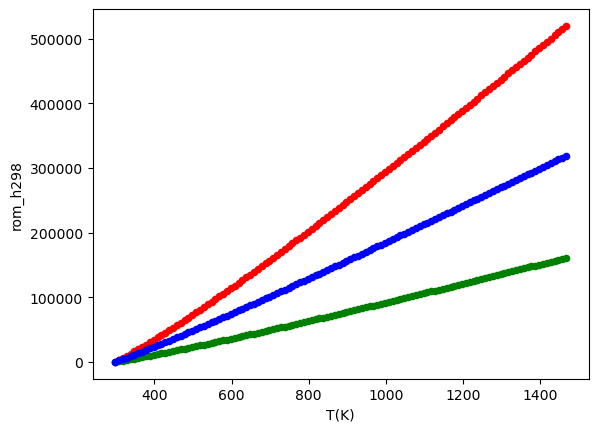

In [133]:
ax1 = enthalpy.plot(kind='scatter', x='T(K)', y='menz_h298', color='r')
ax2 = enthalpy.plot(kind='scatter', x='T(K)', y='vic_h298', color='g', ax=ax1)    
ax3 = enthalpy.plot(kind='scatter', x='T(K)', y='rom_h298', color='b', ax=ax1)

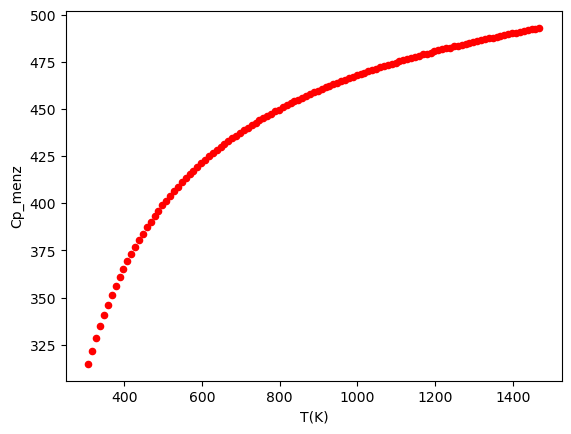

In [134]:
ax1 = enthalpy.plot(kind='scatter', x='T(K)', y='Cp_menz', color='r')
# ax2 = enthalpy.plot(kind='scatter', x='T(K)', y='Cp_vic', color='g', ax=ax1)    
# ax3 = enthalpy.plot(kind='scatter', x='T(K)', y='Cp_rom', color='b', ax=ax1)

### menzelite

Note that for some reason there is no c_2 parameter in the original pyrope thermo data 

In [138]:
def f(T, c_1, c_3, c_5):
    return c_1 + c_3/T**2 + c_5/np.sqrt(T)

In [139]:
# c1 = 600.0 c3 = -5100000 c5 = -4000.2 
ydata = enthalpy['Cp_menz']
ydata = ydata[1:]
xdata = enthalpy['T(K)']
xdata = xdata[1:]

beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([ 5.99733300e+02, -5.46272575e+06, -3.99167545e+03])

### vicentite

In [140]:
def f(T, c_1, c_2, c_3, c_5):
    return c_1 + c_2*T + c_3/T**2 + c_5/np.sqrt(T)

In [141]:
# c1 = 160.0 c2 = .600E-2 c3 = -2560600 c5 = -599.2  
ydata = enthalpy['Cp_vic']
ydata = ydata[1:]
xdata = enthalpy['T(K)']
xdata = xdata[1:]

beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([ 1.58842244e+02,  6.26613742e-03, -2.73778224e+06, -5.68780504e+02])

### romainite

In [142]:
# c1 = 342.7 c2 = -.5037E-2 c3 = -2205100 c5 = -1678.1   
ydata = enthalpy['Cp_rom']
ydata = ydata[1:]
xdata = enthalpy['T(K)']
xdata = xdata[1:]

beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([ 3.42038001e+02, -4.86290890e-03, -2.38340130e+06, -1.66122742e+03])

# Expansion coefficient

In [143]:
file_name = "X-ray_data/isobar-1bar.csv"
isobar = pd.read_csv(file_name, delimiter=',')
#list(isobar)
isobar.columns = isobar.columns.str.replace(' ', '')

isobar['menz_v_v0'] = isobar['menz_v(J/mol/bar)']/isobar['menz_v(J/mol/bar)'].iloc[0]
isobar['d_ln_v_v0_dT_menz'] = np.log(isobar['menz_v_v0']).diff()/isobar['T(K)'].diff()

isobar['vic_v_v0'] = isobar['vic_v(J/mol/bar)']/isobar['vic_v(J/mol/bar)'].iloc[0]
isobar['d_ln_v_v0_dT_vic'] = np.log(isobar['vic_v_v0']).diff()/isobar['T(K)'].diff()

isobar['rom_v_v0'] = isobar['rom_v(J/mol/bar)']/isobar['rom_v(J/mol/bar)'].iloc[0]
isobar['d_ln_v_v0_dT_rom'] = np.log(isobar['rom_v_v0']).diff()/isobar['T(K)'].diff()
isobar.head()

xdata = isobar['T(K)']

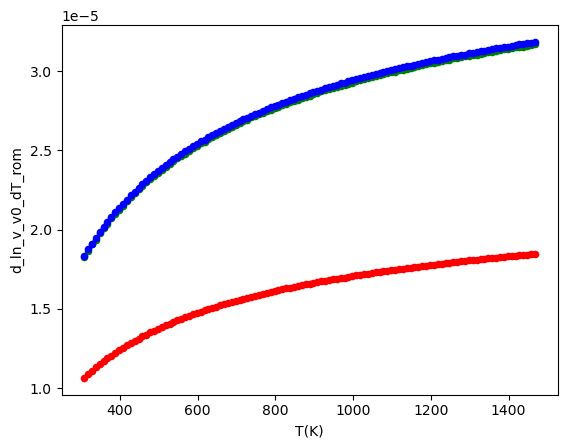

In [144]:
ax1 = isobar.plot(kind='scatter', x='T(K)', y='d_ln_v_v0_dT_menz', color='r')    
ax2 = isobar.plot(kind='scatter', x='T(K)', y='d_ln_v_v0_dT_vic', color='g', ax=ax1)    
ax3 = isobar.plot(kind='scatter', x='T(K)', y='d_ln_v_v0_dT_rom', color='b', ax=ax1)

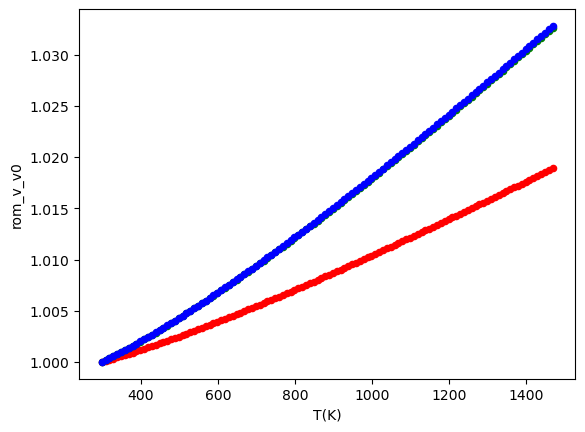

In [145]:
ax1 = isobar.plot(kind='scatter', x='T(K)', y='menz_v_v0', color='r')    
ax2 = isobar.plot(kind='scatter', x='T(K)', y='vic_v_v0', color='g', ax=ax1)    
ax3 = isobar.plot(kind='scatter', x='T(K)', y='rom_v_v0', color='b', ax=ax1)

In [146]:
def f(T, a0):
    return 1 + a0*(T-298.15) - 2*10*a0*(np.sqrt(T) - np.sqrt(298.15)) 

In [147]:
def f2(T, a0, a1):
    return a0 + a1/(np.sqrt(T)) 

In [150]:
# b1 = .2500E-4 b5 = -.2500E-3 b6 = 2007000. b7 = -300.55 b8 = 4  
ydata = isobar['d_ln_v_v0_dT_menz']
ydata = ydata[1:]

xdata = isobar['T(K)']
xdata = xdata[1:]

beta_opt, beta_cov = scipy.optimize.curve_fit(f2, xdata, ydata)
beta_opt, beta_cov

(array([ 2.50749794e-05, -2.53036774e-04]),
 array([[ 8.70197429e-18, -2.30861029e-16],
        [-2.30861029e-16,  6.44025113e-15]]))

### menzelite

In [151]:
# b1 = .2500E-4 b5 = -.2500E-3 b6 = 2007000. b7 = -300.55 b8 = 4 
ydata = isobar['d_ln_v_v0_dT_menz']
ydata = ydata[1:]

beta_opt, beta_cov = scipy.optimize.curve_fit(f2, xdata, ydata)
beta_opt, beta_cov

(array([ 2.50749794e-05, -2.53036774e-04]),
 array([[ 8.70197429e-18, -2.30861029e-16],
        [-2.30861029e-16,  6.44025113e-15]]))

### vicentite

In [153]:
# b1 = .429E-4 b5 = -.429E-3 b6 = 2620000. b7 = -388 b8 = 4 
ydata = isobar['d_ln_v_v0_dT_vic']
ydata = ydata[1:]

beta_start = (1)
beta_opt, beta_cov = scipy.optimize.curve_fit(f2, xdata, ydata)
beta_opt, beta_cov

(array([ 4.30279989e-05, -4.34191001e-04]),
 array([[ 5.74104036e-17, -1.52308251e-15],
        [-1.52308251e-15,  4.24889116e-14]]))

### romainite

In [154]:
# b1 = .431E-4 b5 = -.431E-3 b6 = 1945000. b7 = -291.75 b8 = 4 
ydata = isobar['d_ln_v_v0_dT_rom']
ydata = ydata[1:]

beta_start = (1)
beta_opt, beta_cov = scipy.optimize.curve_fit(f2, xdata, ydata)
beta_opt, beta_cov

(array([ 4.32290155e-05, -4.36226901e-04]),
 array([[ 3.32316661e-17, -8.81627123e-16],
        [-8.81627123e-16,  2.45944499e-14]]))

# Bulk modulus

Molar volume at T and P
$$ v(T,P) = v(T,1)\left [ 1-\frac{4P}{\kappa_T + 4P} \right]^{1/4} $$

In [155]:
menz = {'G0' : -5900105, 
      'S0' : 280.3,  
      'V0' : 8.318, 
      'c_1': 600.0, 'c_2':0,        'c_3':-5100000, 'c_5':-4000.2, 
      'b_1': .2500E-4,'b_5':-.2500E-3, 'b_6':2007000, 'b_7':-300.55
     }

print(-1.5E-4*menz['b_6'])      # final formulation in HP98
print(-3*fo['b_1']*menz['b_6']) # original formulation from Holland 1996 

-301.04999999999995
-369.08729999999997


In [156]:
file_name = "X-ray_data/isotherm-298K.csv"
isotherm = pd.read_csv(file_name, delimiter=',')
#list(isobar)
isotherm.columns = isotherm.columns.str.replace(' ', '')
isotherm['menz_v_v0'] = isotherm['menz_v(J/mol/bar)']/isotherm['menz_v(J/mol/bar)'].iloc[0]
isotherm['vic_v_v0'] = isotherm['vic_v(J/mol/bar)']/isotherm['vic_v(J/mol/bar)'].iloc[0]
isotherm['rom_v_v0'] = isotherm['rom_v(J/mol/bar)']/isotherm['rom_v(J/mol/bar)'].iloc[0]

xdata = isotherm['P(bar)']
isotherm.head()

,P(bar),menz_v(J/mol/bar),vic_v(J/mol/bar),rom_v(J/mol/bar),menz_v_v0,vic_v_v0,rom_v_v0
0,1.0,8.317580,2.657866,3.977799,1.000000,1.000000,1.000000
1,501.0,8.315509,2.657359,3.976777,0.999751,0.999809,0.999743
2,1001.0,8.313441,2.656853,3.975757,0.999502,0.999619,0.999487
3,1501.0,8.311375,2.656347,3.974737,0.999254,0.999428,0.999230
4,2001.0,8.309728,2.655841,3.973918,0.999056,0.999238,0.999024


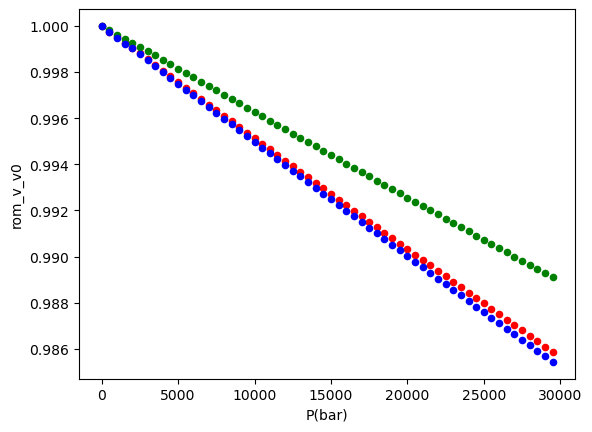

In [157]:
ax1 = isotherm.plot(kind='scatter', x='P(bar)', y='menz_v_v0', color='r')    
ax2 = isotherm.plot(kind='scatter', x='P(bar)', y='vic_v_v0', color='g', ax=ax1)    
ax3 = isotherm.plot(kind='scatter', x='P(bar)', y='rom_v_v0', color='b', ax=ax1)

In [158]:
def v_v0_298(P, Kappa_298):
    return (1 - 4*P/(Kappa_298 + 4*P))**(1/4)

### menzelite

In [159]:
# 'b_6':2007000, 'b_7':-300.55

ydata = isotherm['menz_v_v0']
xdata = isotherm['P(bar)']

beta_opt, beta_cov = optimize.curve_fit(v_v0_298, xdata, ydata)
beta_opt, beta_cov
print('b6 = '+str(beta_opt.round(0)), 'b7 ='+str(-1.5E-4*beta_opt.round(0)))

b6 = [2017806.] b7 =[-302.6709]


### vicentite

In [160]:
# b6 = 2620000. b7 = -388 
ydata = isotherm['vic_v_v0']
xdata = isotherm['P(bar)']

beta_opt, beta_cov = optimize.curve_fit(v_v0_298, xdata, ydata)
beta_opt, beta_cov
print('b6 = '+str(beta_opt.round(0)), 'b7 ='+str(-1.5E-4*beta_opt.round(0)))

b6 = [2638155.] b7 =[-395.72325]


### romainite

In [161]:
# b6 = 1945000. b7 = -291.75 b8 = 4 
ydata = isotherm['rom_v_v0']
xdata = isotherm['P(bar)']

beta_opt, beta_cov = optimize.curve_fit(v_v0_298, xdata, ydata)
beta_opt, beta_cov
print('b6 = '+str(beta_opt.round(0)), 'b7 ='+str(-1.5E-4*beta_opt.round(0)))

b6 = [1955169.] b7 =[-293.27535]


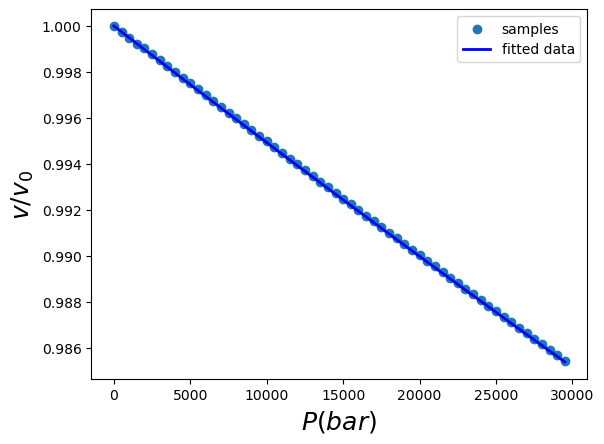

In [162]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, v_v0_298(xdata, 1945000), 'b', lw=2, label='fitted data')
ax.set_xlabel(r"$P(bar)$", fontsize=18)
ax.set_ylabel(r"$v/v_0$", fontsize=18)
ax.legend()
 

# Third low entropy

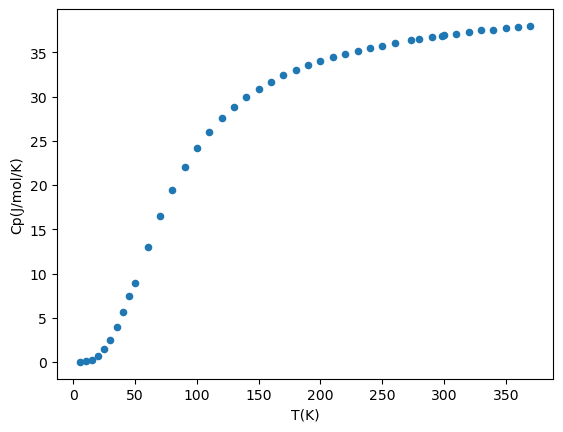

In [163]:
file_name = "Calorimetric_data/Calorimetry_vic_low_T.txt"
Cp_vic = pd.read_csv(file_name, delimiter='\s+')

Cp_vic.plot.scatter('T(K)', 'Cp(J/mol/K)')
Cp_vic['Cp(J/mol/K)/T'] = Cp_vic["Cp(J/mol/K)"]/Cp_vic["T(K)"]

<Axes: xlabel='T(K)', ylabel='Cp(J/mol/K)/T'>

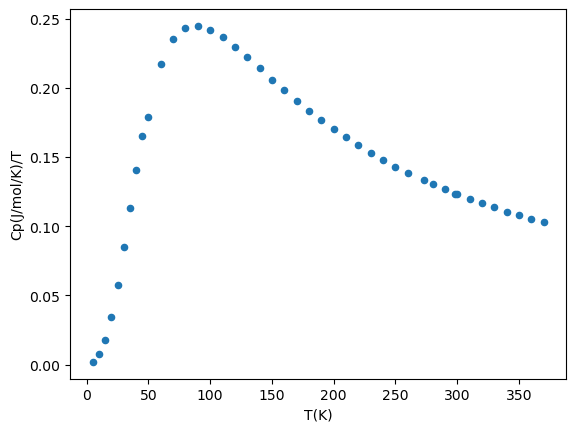

In [164]:
Cp_vic.plot.scatter('T(K)', 'Cp(J/mol/K)/T')

In [165]:
# G0 = -1560000 S0 = 49.9 V0 = 2.658  
S_vic = scipy.integrate.simps(Cp_vic['Cp(J/mol/K)/T'], Cp_vic["T(K)"])
S_vic

# from enthalpy of formation to reference gibbs

In [166]:
H_vic = -1545122
G0_vic = H_vic - 298.15*S_vic
G0_vic


# Enthalpy and entropy from HP experiments

In [167]:
def g(T,P,phase):
    T_r = 298.15
    return (
    phase.get('G0')                    + 
    phase.get('S0')*(T_r - T)          +

    2*np.sqrt(T)*phase.get('c_5')      - 2*np.sqrt(T_r)*phase.get('c_5') +
    T**2*phase.get('c_2')/2            - T_r**2*phase.get('c_2')/2       +
    T*phase.get('c_1')                 - T_r*phase.get('c_1')            +
    phase.get('c_3')/T_r               - phase.get('c_3')/T              - 
    
    T*(T*phase.get('c_2')              - T_r*phase.get('c_2')            + 
       phase.get('c_1')*np.log(T)      - phase.get('c_1')*np.log(T_r)    + 
       phase.get('c_3')/(2*T_r**2)     - phase.get('c_3')/(2*T**2)       + 
       2*phase.get('c_5')/np.sqrt(T_r) - 2*phase.get('c_5')/np.sqrt(T))  +
    
    phase.get('V0')                                                 *
    (phase.get('b_6') + phase.get('b_7')*(T - T_r))**0.25           *
    ((4*P + phase.get('b_6') + phase.get('b_7')*(T - T_r))**0.75 - 
     (4   + phase.get('b_6') + phase.get('b_7')*(T - T_r))**0.75)   *
    (2.0*T**0.5*phase.get('b_5') - 2.0*T_r**0.5*phase.get('b_5')    + 
     T*phase.get('b_1')          - T_r*phase.get('b_1') + 1.0)/3
    )

In [176]:
fo = {'G0' :-2053138, 
      'S0' : 95.1, 
      'V0' : 4.366, 
      'c_1': 233.3, 'c_2':.1494E-2, 'c_3':-603800, 'c_5':-1869.7, 
      'b_1':.613E-4,'b_5':-.613E-3, 'b_6':1250000, 'b_7':-187.5,
      'c_4': 0     ,'c_6':  0     , 'c_7':0      , 'c_8':0     ,
      'b_8': 0
     }

G0_rom, S0_rom  = sp.symbols("G^0_rom, S^0_rom")
# rom = {'G0' :-2106030, 
#       'S0' : 81.5,
#       'V0' : 3.978, 
#       'c_1': 342.7, 'c_2':-.5037E-2, 'c_3':-2205100, 'c_5':-1678.1, 
#       'b_1':.431E-4,'b_5':-.431E-3, 'b_6':1945000, 'b_7':-291.75
#      }

rom = {'G0' :G0_rom, 
      'S0' : S0_rom,
      'V0' : 3.978, 
      'c_1': 342.7, 'c_2':-.5037E-2, 'c_3':-2205100, 'c_5':-1678.1, 
      'b_1':.431E-4,'b_5':-.431E-3, 'b_6':1945000, 'b_7':-291.75
     }

# menz     EoS = 2                                                                    
# MGO(3)X2O3(1)SIO2(3)
G0_menz, S0_menz  = sp.symbols("G^0_menz, S^0_menz")
menz = {'G0' : G0_menz, 
      'S0' : S0_menz,  
      'V0' : 8.318, 
      'c_1': 600.0, 'c_2':0,        'c_3':-5100000, 'c_5':-4000.2, 
      'b_1': .2500E-4,'b_5':-.2500E-3, 'b_6':2007000, 'b_7':-300.55
     }

# menz = {'G0' : -5900105, 
#       'S0' : 280.3,  
#       'V0' : 8.318, 
#       'c_1': 600.0, 'c_2':0,        'c_3':-5100000, 'c_5':-4000.2, 
#       'b_1': .2500E-4,'b_5':-.2500E-3, 'b_6':2007000, 'b_7':-300.55
#      }

vic = {'G0' :-1560000, 
      'S0' : 49.9, 
      'V0' : 2.658, 
      'c_1': 160.0, 'c_2':.600E-2, 'c_3':-2560599, 'c_5':-599.2, 
      'b_1':.429E-4,'b_5':-.429E-3, 'b_6':2620000, 'b_7':-388
     }

per = {'G0' :-569276.5, 
      'S0' : 26.9, 
      'V0' : 1.125, 
      'c_1': 60.5, 'c_2':.362E-3, 'c_3':-535800, 'c_5':-299.2, 
      'b_1':.62E-4,'b_5':-.62E-3, 'b_6':1650000, 'b_7':-247.5
     }

Reaction 1: 1.00 per + 1.00 vic = 1.00 rom

In [177]:
Temp = 860.4
Pres = 0.4950E+05
Eq1 = (1*g(Temp,Pres,rom) - 1*g(Temp,Pres,per) -1*g(Temp,Pres,vic))
Eq1

In [178]:
G0_rom, S0_rom  = 0, 0
rom = {'G0' :G0_rom, 
      'S0' : S0_rom,
      'V0' : 3.978, 
      'c_1': 342.7, 'c_2':-.5037E-2, 'c_3':-2205100, 'c_5':-1678.1, 
      'b_1':.431E-4,'b_5':-.431E-3, 'b_6':1945000, 'b_7':-291.75
     }

df = pd.read_csv('reaction_1.txt', delimiter='\s+')
T = df['T'].values
P = df['P'].values
xdata = -(298.15 - T)
ydata = -((1*g(T,P,rom) - 1*g(T,P,per) -1*g(T,P,vic)))

In [179]:
def f(x, b0, b1):
    return b0 -b1*x

In [180]:
popt, pcov = scipy.optimize.curve_fit(f, xdata, ydata)
popt

array([-2.10600789e+06,  8.15468821e+01])

Reaction 2: 4.00 per 1.00 menz =  3.00 fo 1.00 rom

In [181]:
rom = {'G0' :-2106020, 
      'S0' : 81.5,
      'V0' : 3.978, 
      'c_1': 342.7, 'c_2':-.5037E-2, 'c_3':-2205100, 'c_5':-1678.1, 
      'b_1':.431E-4,'b_5':-.431E-3, 'b_6':1945000, 'b_7':-291.75
     }

In [182]:
Temp = 860.4
Pres = 0.4950E+05
Eq2 = (3*g(Temp,Pres,fo) + 1*g(Temp,Pres,rom) - 4*g(Temp,Pres,per) -1*g(Temp,Pres,menz))
Eq2

In [183]:
G0_menz, S0_menz  = 0, 0
menz = {'G0' : G0_menz, 
      'S0' : S0_menz,  
      'V0' : 8.318, 
      'c_1': 600.0, 'c_2':0,        'c_3':-5100000, 'c_5':-4000.2, 
      'b_1': .2500E-4,'b_5':-.2500E-3, 'b_6':2007000, 'b_7':-300.55
     }

def f(x, b0, b1):
    return -b0 + b1*x

df = pd.read_csv('reaction_2.txt', delimiter='\s+')
T = df['T'].values
P = df['P'].values
xdata = -(298.15 - T)
ydata = -(3*g(T,P,fo) + 1*g(T,P,rom) - 4*g(T,P,per) -1*g(T,P,menz))

In [184]:
popt, pcov = curve_fit(f, xdata, ydata)

In [185]:
print(popt)
np.sum((ydata - f(xdata, *popt))**2)

[-5.90001697e+06  2.80624515e+02]


In [186]:
menz = {'G0' : -5900105, 
      'S0' : 280.3,  
      'V0' : 8.318, 
      'c_1': 600.0, 'c_2':0,        'c_3':-5100000, 'c_5':-4000.2, 
      'b_1': .2500E-4,'b_5':-.2500E-3, 'b_6':2007000, 'b_7':-300.55
     }

In [187]:
rom = {'G0' :G0_rom, 
      'S0' : S0_rom,
      'V0' : 3.978, 
      'c_1': 342.7, 'c_2':-.5037E-2, 'c_3':-2205100, 'c_5':-1678.1, 
      'b_1':.431E-4,'b_5':-.431E-3, 'b_6':1945000, 'b_7':-291.75
     }

# Margules parameters for Vic(PGG)

to do... compute with werami a section for X(C1) = 0.5 to compute the critical temperature

In [188]:
P = np.array([1000, 20000])
W = (37484 - 0.2*P)/2
W

array([18642., 16742.])

In [189]:
Tc = W/2/8.3144
Tc

array([1121.06706437, 1006.80746656])

In [190]:
def W_(P, w, w_P):
    return w + w_P*P

xdata = [1000, 20000]
ydata = [18642, 16742]
popt, pcov = curve_fit(W_, xdata, ydata)
popt*2

/Users/josealbertopadronnavarta/miniconda3/envs/pnja/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([ 3.7484e+04, -2.0000e-01])

# Thermodynamic data of the new endmembers

In [ ]:

rom = {'G0' :-2106030, 
      'S0' : 81.5,
      'V0' : 3.978, 
      'c_1': 342.7, 'c_2':-.5037E-2, 'c_3':-2205100, 'c_5':-1678.1, 
      'b_1':.431E-4,'b_5':-.431E-3, 'b_6':1945000, 'b_7':-291.75
     }

menz = {'G0' : -5900105, 
      'S0' : 280.3,  
      'V0' : 8.318, 
      'c_1': 600.0, 'c_2':0,        'c_3':-5100000, 'c_5':-4000.2, 
      'b_1': .2500E-4,'b_5':-.2500E-3, 'b_6':2007000, 'b_7':-300.55
     }

vic = {'G0' :-1560000, 
      'S0' : 49.9, 
      'V0' : 2.658, 
      'c_1': 160.0, 'c_2':.600E-2, 'c_3':-2560599, 'c_5':-599.2, 
      'b_1':.429E-4,'b_5':-.429E-3, 'b_6':2620000, 'b_7':-388
     }
